## Configuring DMRS
This notebook shows different DMRS configurations

In [1]:
import numpy as np
import scipy.io

from neoradium import Carrier, PDSCH, Grid


In [2]:
carrier = Carrier(numRbs=5, spacing=30)  # 5*12*30000 = 1,800,000 Hz
carrier.print()


Carrier Properties:
  startRb: 0
  numRbs: 5
  Cell Id: 1
  Active Bandwidth Part: 0
  Bandwidth Parts: 1
  Bandwidth Part 0:
    Resource Blocks: 5 RBs starting at 0 (60 subcarriers)
    Subcarrier Spacing: 30 KHz
    CP Type: normal
    bandwidth: 1800000 Hz
    symbolsPerSlot: 14
    slotsPerSubFrame: 2
    nFFT: 128



In [3]:
# Create a 2-layer PDSCH with Mapping Type A (default) using All Symbols and PRBs in the BWP (default)
pdsch = PDSCH(carrier.curBwp, numLayers=2)
pdsch.setDMRS()     # Default DMRS settings
pdsch.print()


PDSCH Properties:
  mappingType: A
  nID: 1
  rnti: 1
  numLayers: 2
  numCodewords: 1
  modulation: 16QAM
  portSet: [0, 1]
  symSet:   0   1   2   3   4   5   6   7   8   9  10  11  12  13
  prbSet:   0   1   2   3   4
  interleavingBundleSize: 0
  PRG Size: Wideband
  Bandwidth Part:
    Resource Blocks: 5 RBs starting at 0 (60 subcarriers)
    Subcarrier Spacing: 30 KHz
    CP Type: normal
    bandwidth: 1800000 Hz
    symbolsPerSlot: 14
    slotsPerSubFrame: 2
    nFFT: 128
  DMRS:
    configType: 1
    nIDs: []
    scID: 0
    sameSeq: 1
    symbols: Single
    typeA1stPos: 2
    additionalPos: 0
    cdmGroups: [0, 0]
    deltaShifts: [0, 0]
    allCdmGroups: [0]
    symSet: [2]
    REs (before shift): [0, 2, 4, 6, 8, 10]
    epreRatioDb: 0 (db)



In [4]:
# Get a resourse grid from the PDSCH object. This creates a Grid object and populates it with the DMRS values
grid = pdsch.getGrid()

grid.getStats() # Print some statistics about the grid

{'GridSize': 1680, 'UNASSIGNED': 1620, 'DMRS': 60}

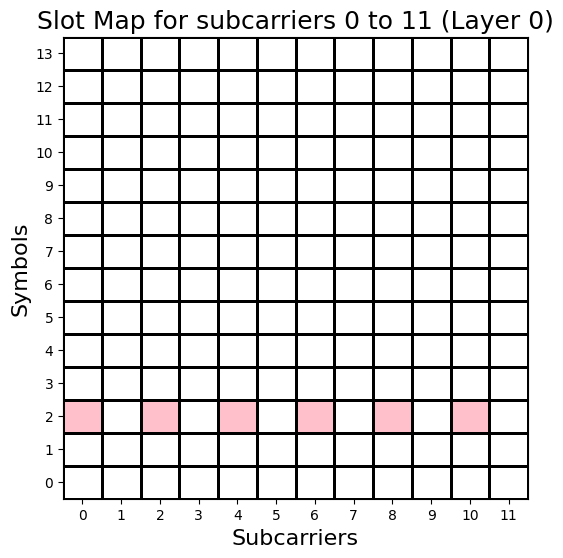

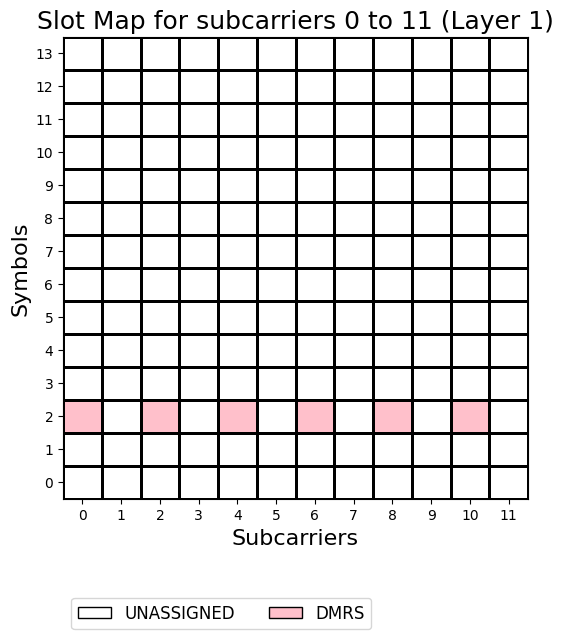

In [5]:
# Draw grid map for all layers, one slot and one PRB (reRange=(0,12))
grid.drawMap(pdsch.portSet, reRange=(0,12))

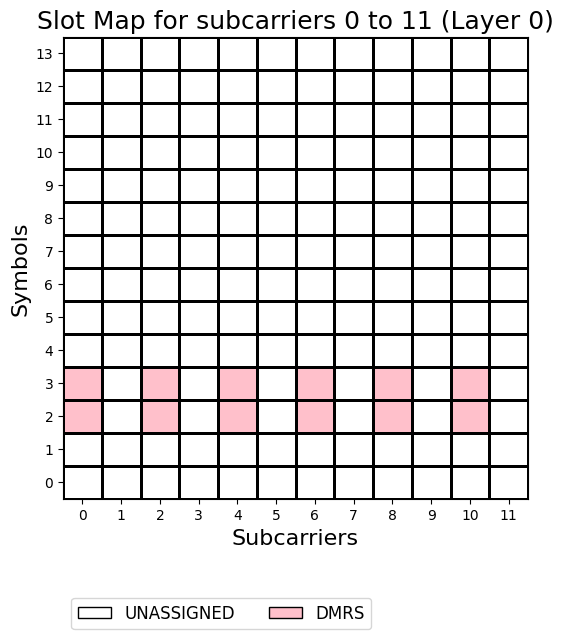

In [6]:
# Lets see an example of DMRS with double symbol (symbols=2) - (Drawing only for one layer)
pdsch.setDMRS(symbols=2)
pdsch.getGrid().drawMap()


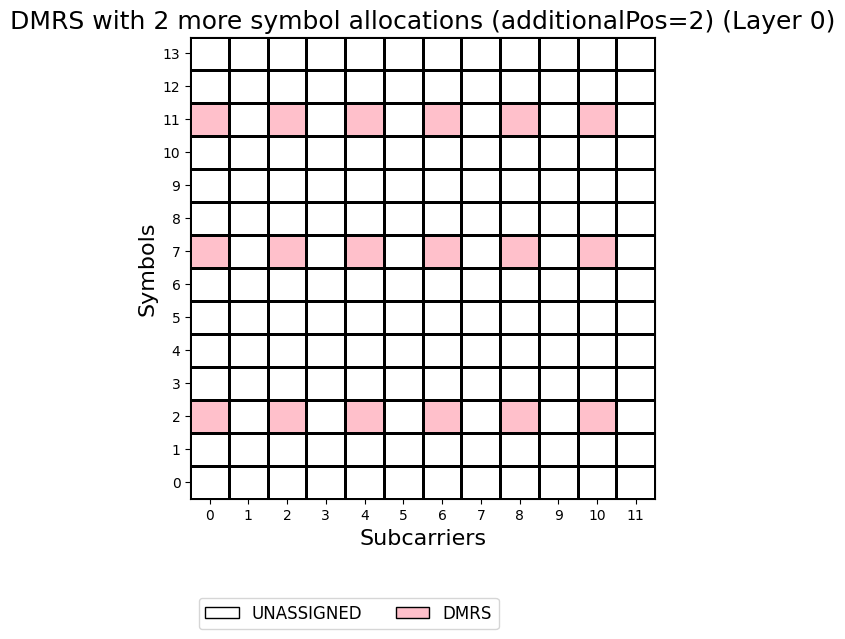

In [7]:
# Using 2 additional symbol positions for DMRS (additionalPos=2)
pdsch.setDMRS(additionalPos=2)  # Using setDMRS 
pdsch.getGrid().drawMap(title="DMRS with 2 more symbol allocations (additionalPos=2)")


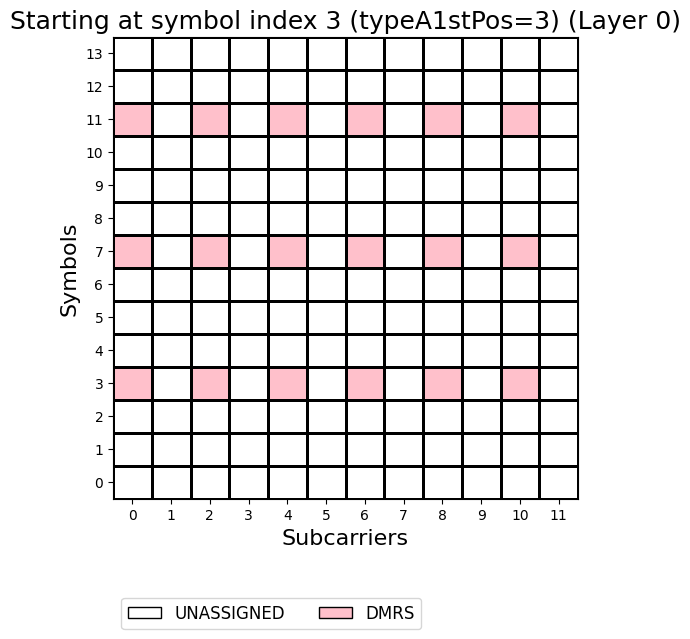

In [8]:
# Same as above but starting at 3rd position (typeA1stPos=3)
# Note that this works only for PDSCH with Mapping Type A
pdsch.setDMRS(additionalPos=2, typeA1stPos=3)
pdsch.getGrid().drawMap(title="Starting at symbol index 3 (typeA1stPos=3)")


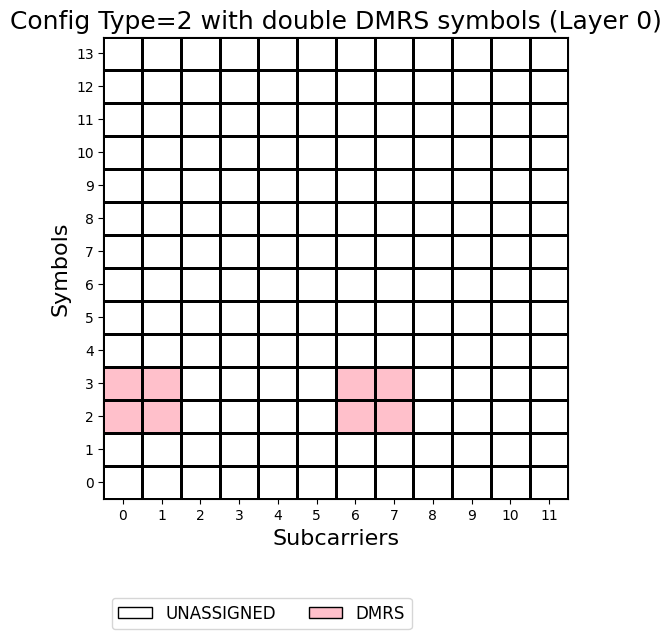

In [9]:
# Now lets see an example of DMRS Config Type 2 and double DMRS symbols (symbols=2)
pdsch.setDMRS(configType=2, symbols=2)
pdsch.getGrid().drawMap(title="Config Type=2 with double DMRS symbols")


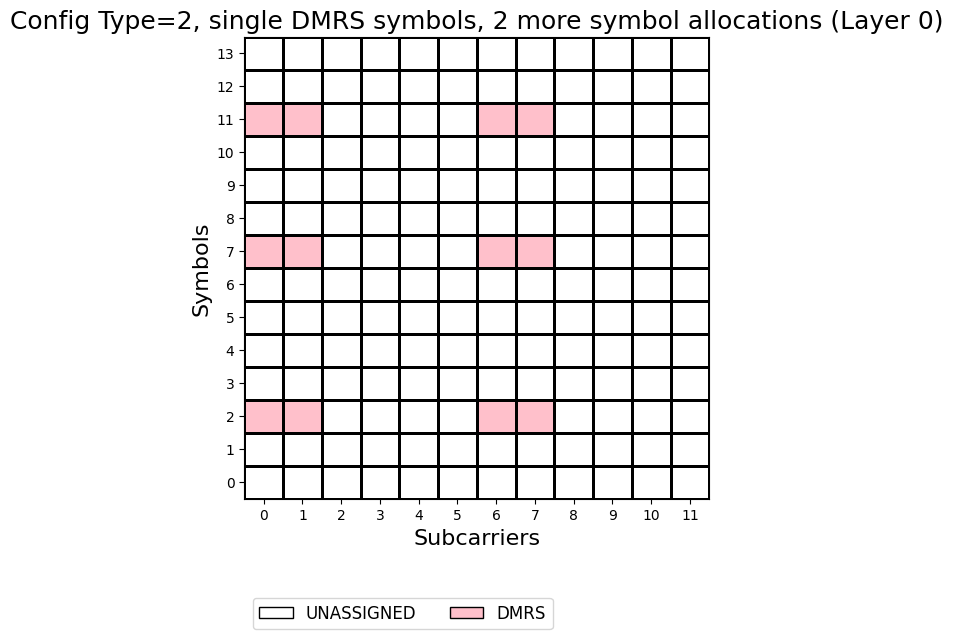

In [10]:
# Using 2 additional symbol positions for DMRS (additionalPos=2)
pdsch.setDMRS(configType=2, additionalPos=2)
pdsch.getGrid().drawMap(title="Config Type=2, single DMRS symbols, 2 more symbol allocations")


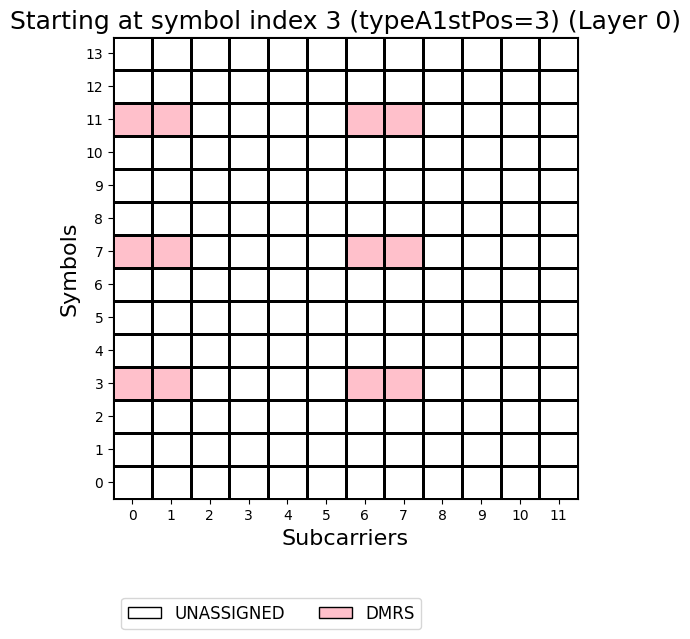

In [11]:
# Same as above but starting at 3rd position (typeA1stPos=3)
# Note that this works only for PDSCH with Mapping Type A
pdsch.setDMRS(configType=2, additionalPos=2, typeA1stPos=3)
pdsch.getGrid().drawMap(title="Starting at symbol index 3 (typeA1stPos=3)")



PDSCH Properties:
  mappingType: B
  nID: 1
  rnti: 1
  numLayers: 2
  numCodewords: 1
  modulation: 16QAM
  portSet: [0, 1]
  symSet:   0   1   2   3   4   5   6   7   8   9  10  11  12
  prbSet:   0   1   2   3   4
  interleavingBundleSize: 0
  PRG Size: Wideband
  Bandwidth Part:
    Resource Blocks: 5 RBs starting at 0 (60 subcarriers)
    Subcarrier Spacing: 30 KHz
    CP Type: normal
    bandwidth: 1800000 Hz
    symbolsPerSlot: 14
    slotsPerSubFrame: 2
    nFFT: 128
  DMRS:
    configType: 1
    nIDs: []
    scID: 0
    sameSeq: 1
    symbols: Double
    typeA1stPos: 2
    additionalPos: 1
    cdmGroups: [0, 0]
    deltaShifts: [0, 0]
    allCdmGroups: [0]
    symSet: [0 1 8 9]
    REs (before shift): [0, 2, 4, 6, 8, 10]
    epreRatioDb: 0 (db)



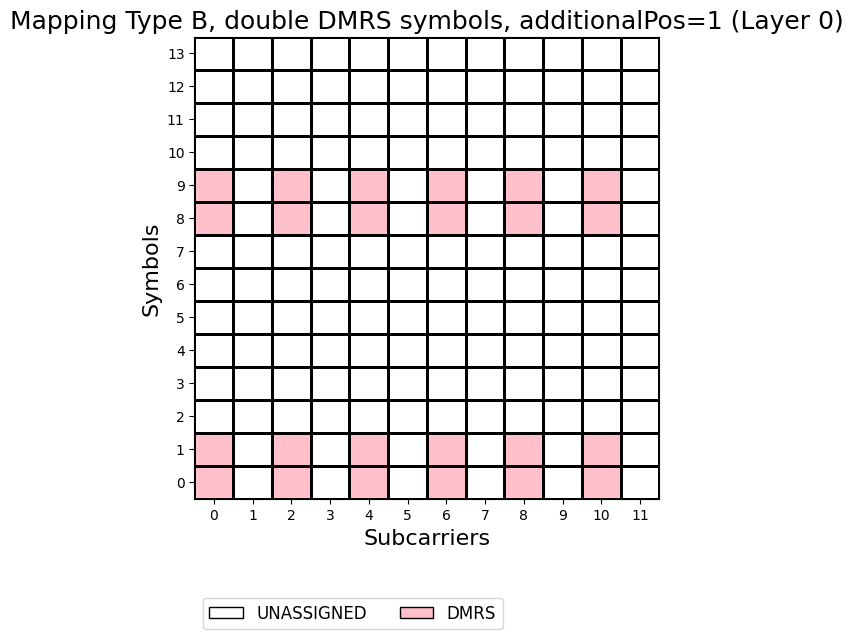

In [12]:
# Now using a PDSCH with mapping type B (DMRS symbols are relative to PDSCH start symbol)
pdsch = PDSCH(carrier.curBwp, mappingType='B', numLayers=2)

# Default DMRS settings with 1 additional symbol positions, double symbols
pdsch.setDMRS(additionalPos=1, symbols=2) 
pdsch.print()
pdsch.getGrid().drawMap(title="Mapping Type B, double DMRS symbols, additionalPos=1")


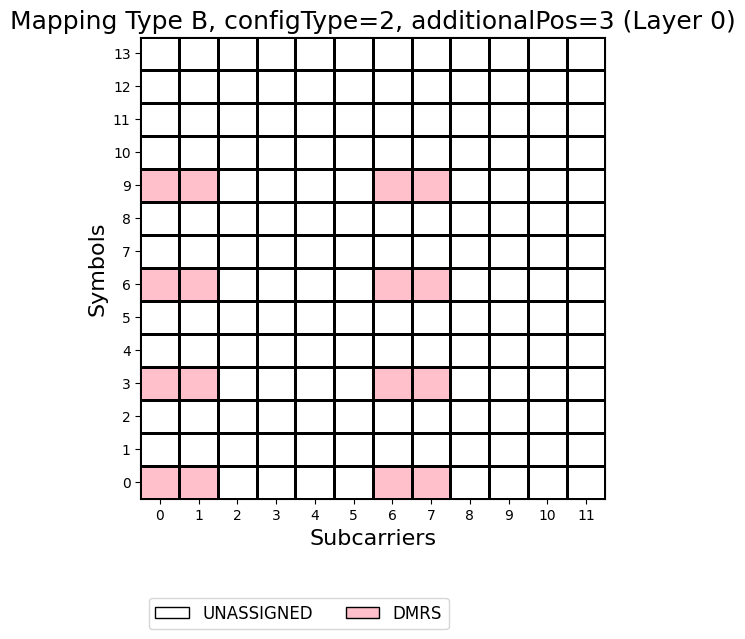

In [13]:
# Now using Config Type 2 (still with Mapping Type B)
pdsch.setDMRS(configType=2, additionalPos=3)                # 3 additional symbol positions
pdsch.getGrid().drawMap(title="Mapping Type B, configType=2, additionalPos=3")
